<a href="https://colab.research.google.com/github/Chaqmoqjon/Machine-Learning/blob/main/2_StratifiedShuffleSplit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

##Datani tayyorlash

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/ageron/handson-ml2/master/datasets/housing/housing.csv')
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [ ]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


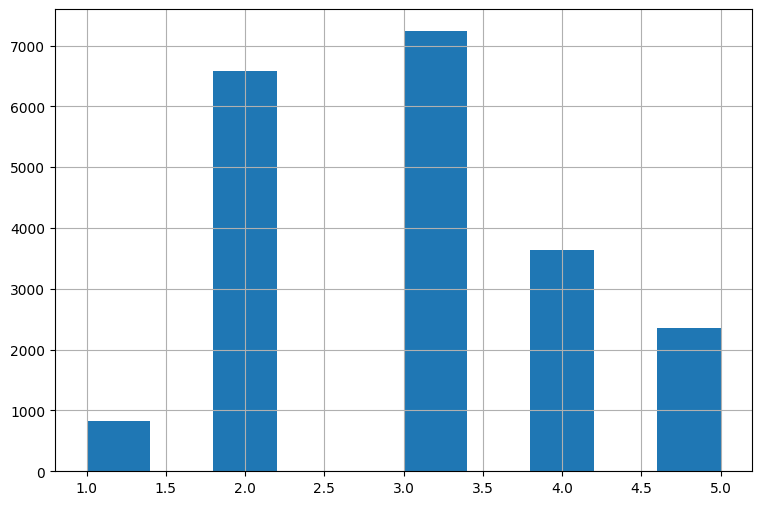

In [ ]:
df['income_cat'] = pd.cut(df['median_income'], bins = [0., 1.5, 3.0, 4.5, 6., np.inf], labels = [1, 2, 3, 4, 5])
df['income_cat'].hist(figsize=(9,6))
plt.show()

In [ ]:
df.sample(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
11719,-120.11,39.21,18.0,2245.0,392.0,421.0,162.0,4.5795,158300.0,INLAND,4
11353,-117.92,33.75,32.0,790.0,199.0,1196.0,201.0,3.0625,142800.0,<1H OCEAN,3
17715,-121.80,37.35,15.0,2781.0,498.0,1389.0,475.0,5.6140,223300.0,<1H OCEAN,4
15043,-116.92,32.78,21.0,4192.0,752.0,2101.0,710.0,4.4306,159100.0,<1H OCEAN,3
18303,-122.13,37.42,36.0,3982.0,1045.0,2251.0,995.0,3.5364,314100.0,NEAR BAY,3
173,-122.25,37.80,43.0,2344.0,647.0,1710.0,644.0,1.6504,151800.0,NEAR BAY,2
11890,-117.37,33.97,40.0,1166.0,250.0,976.0,244.0,1.9500,84800.0,INLAND,2
5988,-117.72,34.10,32.0,3241.0,895.0,1592.0,810.0,2.4952,181800.0,INLAND,2
3177,-119.93,36.32,25.0,8363.0,1636.0,7679.0,1580.0,2.0285,106300.0,INLAND,2
897,-121.96,37.53,28.0,2949.0,529.0,1538.0,545.0,4.9615,228000.0,<1H OCEAN,4


##StratifiedShuffleSplit
Balansni saqlagan holda random qiymatlarni qaytaradi

In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit
stratified_split = StratifiedShuffleSplit(n_splits = 1, test_size = 0.2, random_state = 35)

In [ ]:
for train_index, test_index in  stratified_split.split(df, df['income_cat']): #income_cat ustuniga nisbatan random indeks qaytaradi
  strat_train_set = df.loc[train_index]
  strat_test_set = df.loc[test_index]

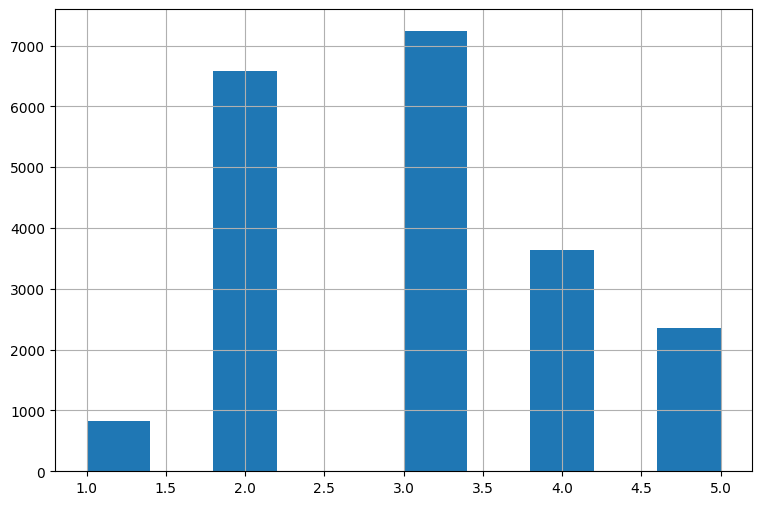

In [ ]:
df['income_cat'].hist(figsize=(9,6))
plt.show()

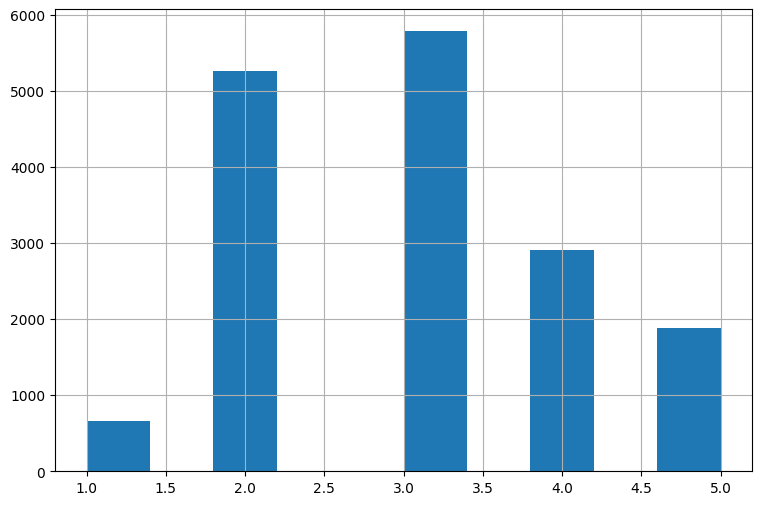

In [ ]:
strat_train_set['income_cat'].hist(figsize=(9,6)) #balans saqlangan holatda chiqarildi
plt.show()

In [ ]:
strat_test_set.drop('income_cat', axis = 1, inplace = True) #endi bu ustun kerak emas,
strat_train_set.drop('income_cat', axis = 1, inplace = True)

In [ ]:
housing = strat_train_set.copy()
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
11912,-117.44,33.96,29.0,124.0,22.0,50.0,18.0,12.5381,112500.0,INLAND
16247,-121.27,37.98,43.0,1005.0,200.0,492.0,172.0,2.6812,72800.0,INLAND
16551,-121.23,37.82,14.0,1847.0,325.0,1030.0,309.0,4.9271,155300.0,INLAND
13960,-116.90,34.25,16.0,3018.0,523.0,556.0,244.0,3.5288,189700.0,INLAND
19232,-122.66,38.48,21.0,2066.0,393.0,919.0,395.0,3.2670,176200.0,<1H OCEAN


##Scatter Plot
Ma'lumotni vizualizatsiya qilib, tekshirish

In [ ]:
from IPython.core.display import display, HTML

display(HTML('<img src="https://www.nationsonline.org/maps/USA/California_map.jpg" alt="California" width="600" />'))

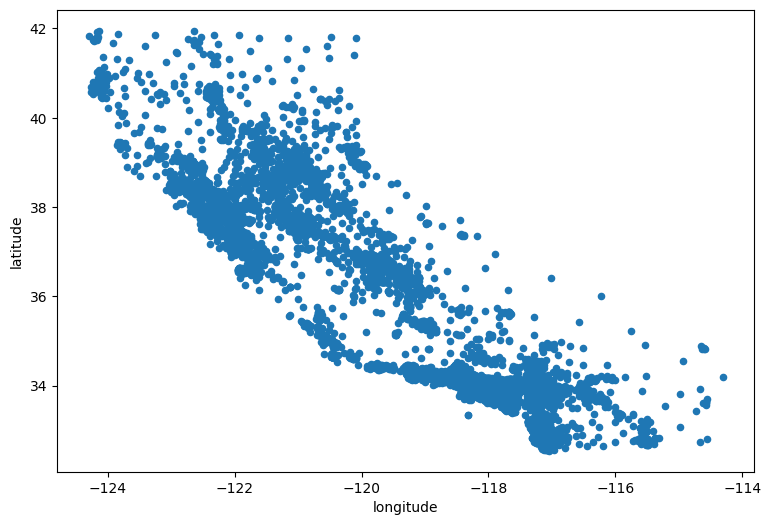

In [ ]:
housing.plot(kind = 'scatter', x = 'longitude', y = 'latitude', figsize=(9,6)) #kordinata o'qi bilan, binolarning qayerlarda joylashganini bilib oldik!
plt.show()

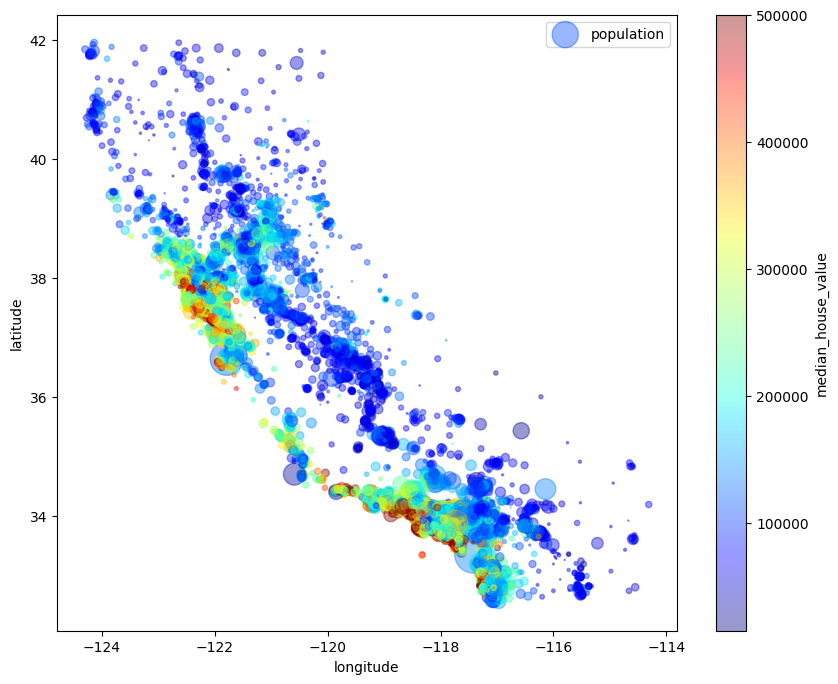

In [ ]:
housing.plot(
    kind = 'scatter',
    x = 'longitude',
    y = 'latitude',
    alpha = 0.4,
    s = housing['population']/50, #nuqta radiusi aholi soniga qarab o'zgaradi
    label = 'population',
    c = 'median_house_value', #nuqta rangi uyning median narxiga qarab o'zgaradi
    cmap ='jet', #ranglar. ko'k - daromadi kam, qizil - daromadi ko'p
    colorbar = True,
    figsize=(10,8)
)
plt.show()

In [ ]:
housing.corrwith(housing['median_house_value'], numeric_only=True).sort_values(ascending = False) #ma'lumotlar o'xshahslik koffetsienti

,0
median_house_value,1.000000
median_income,0.686911
total_rooms,0.137420
housing_median_age,0.103510
households,0.068777
total_bedrooms,0.052306
population,-0.022215
longitude,-0.050266
latitude,-0.140407


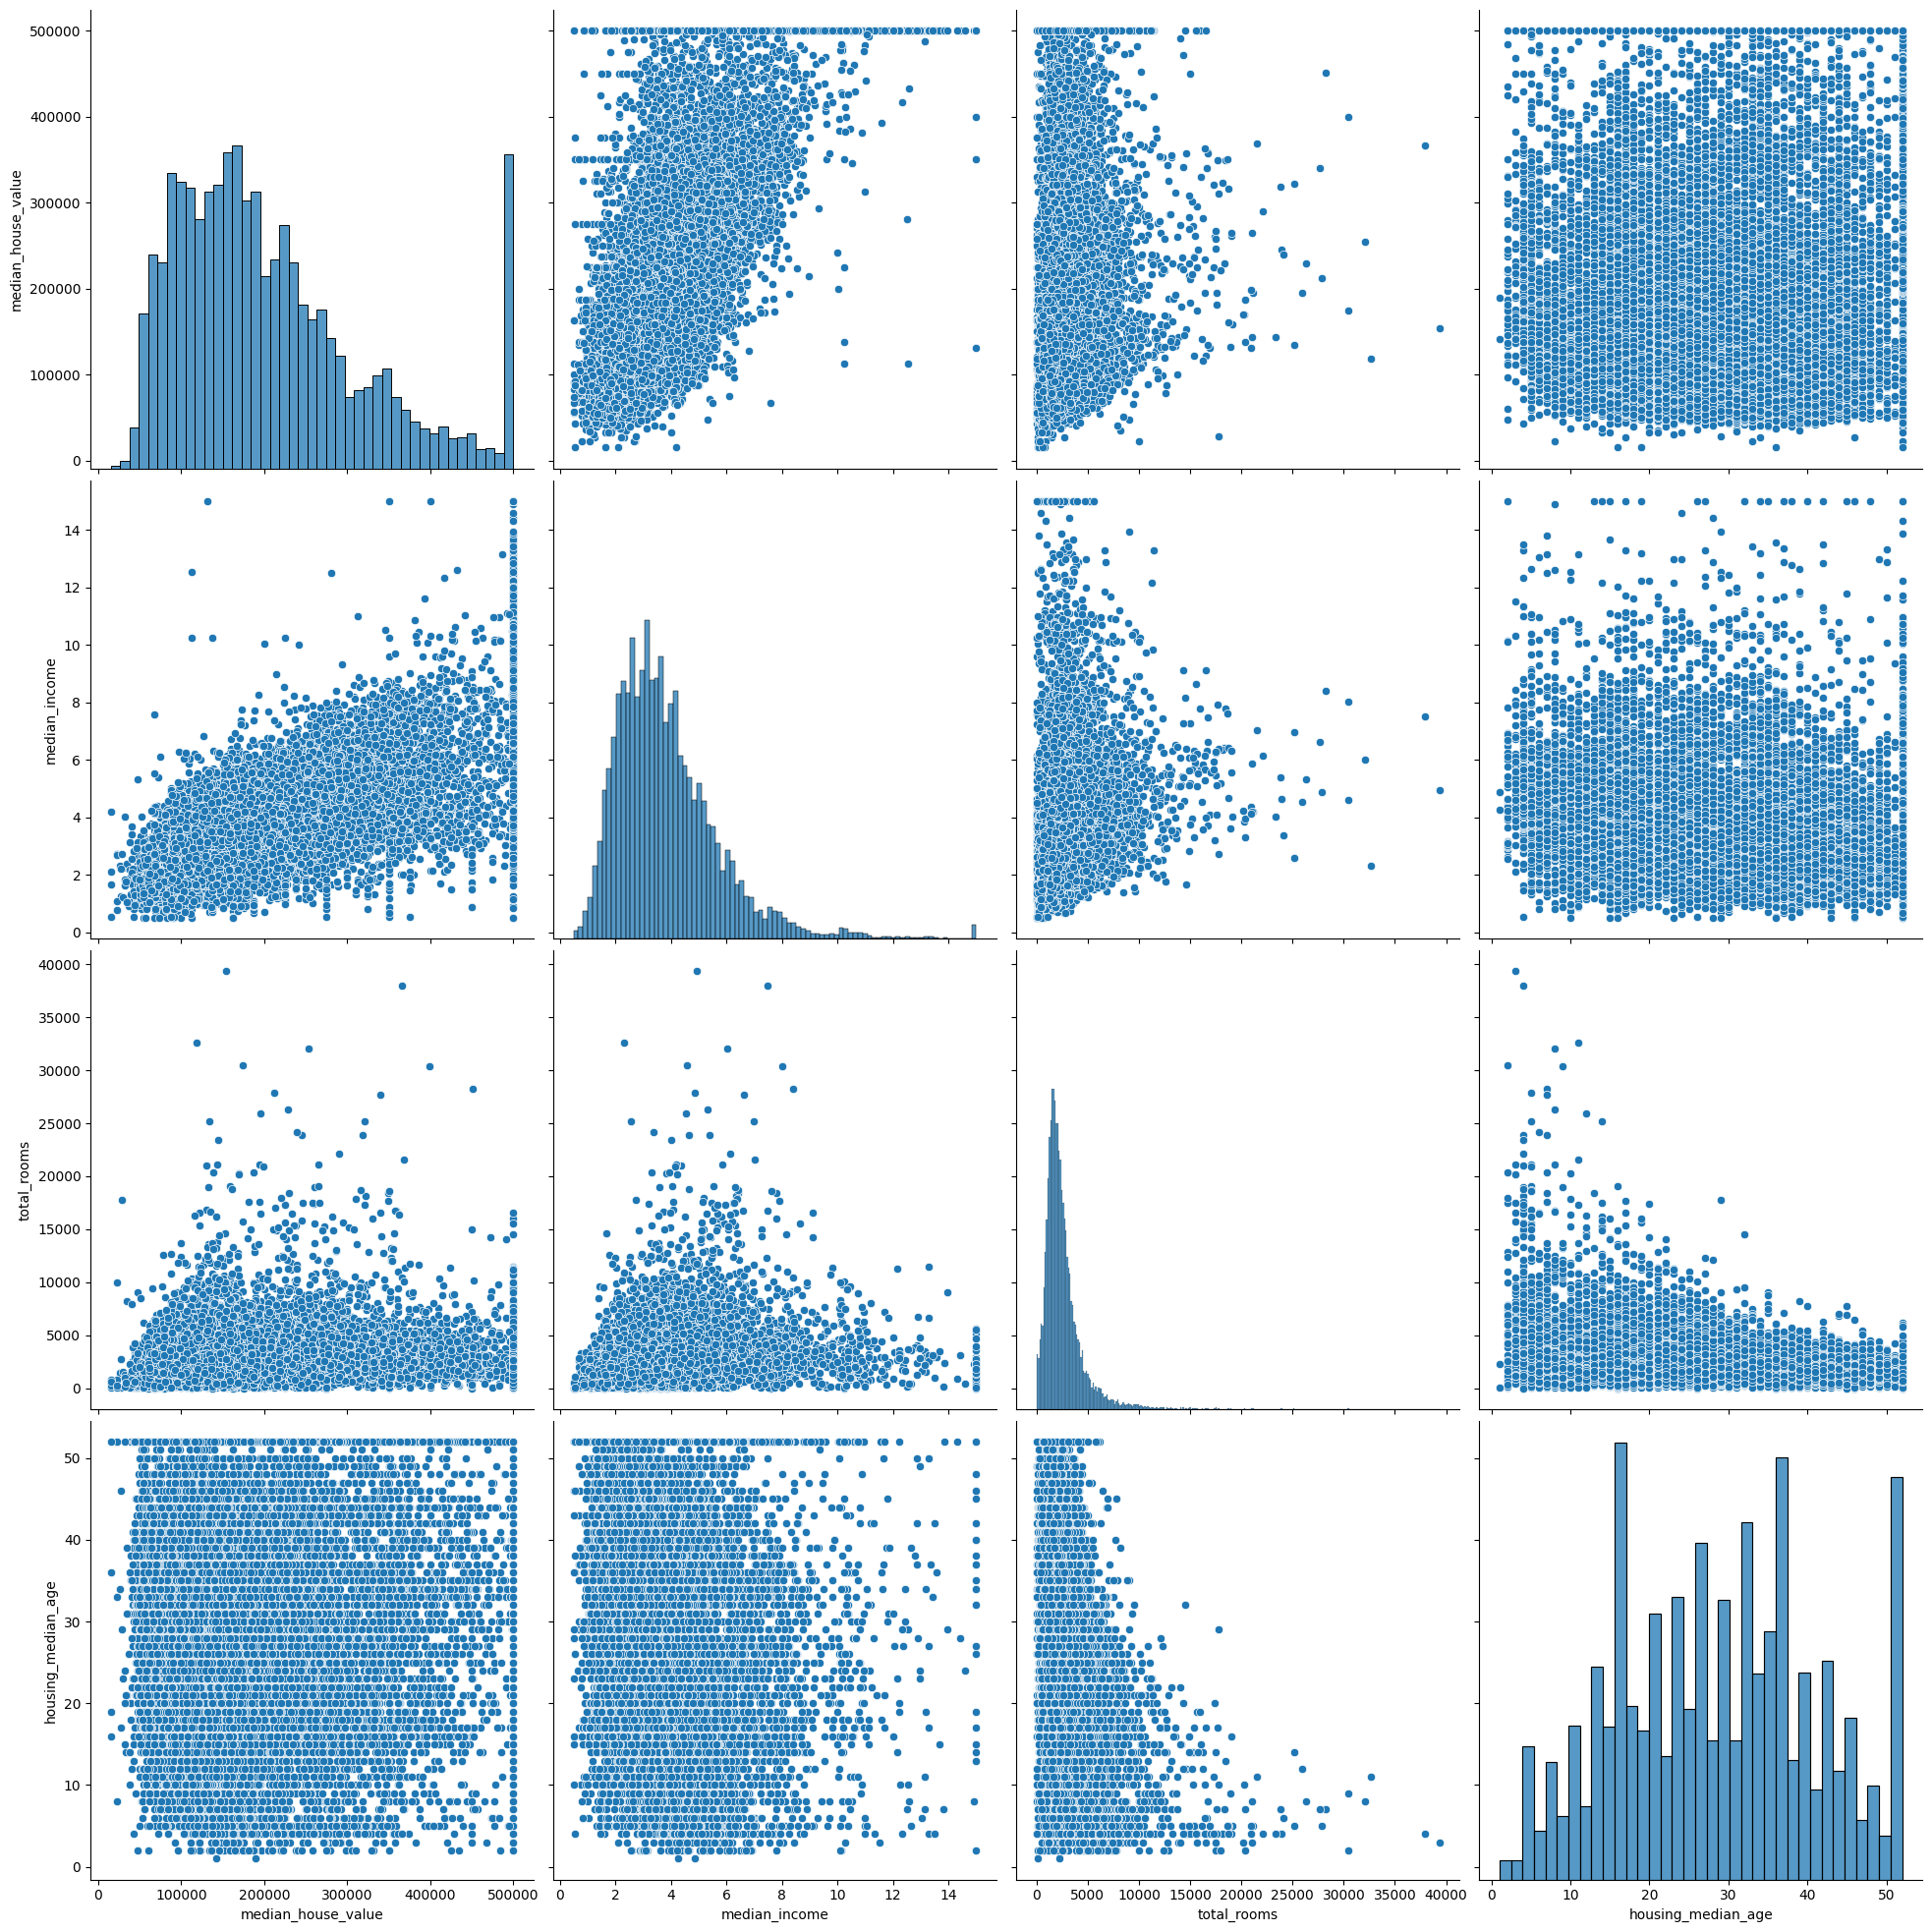

In [ ]:
cols = ['median_house_value', 'median_income', 'total_rooms', 'housing_median_age' ]
sns.pairplot(housing[cols], height=5)
plt.show()

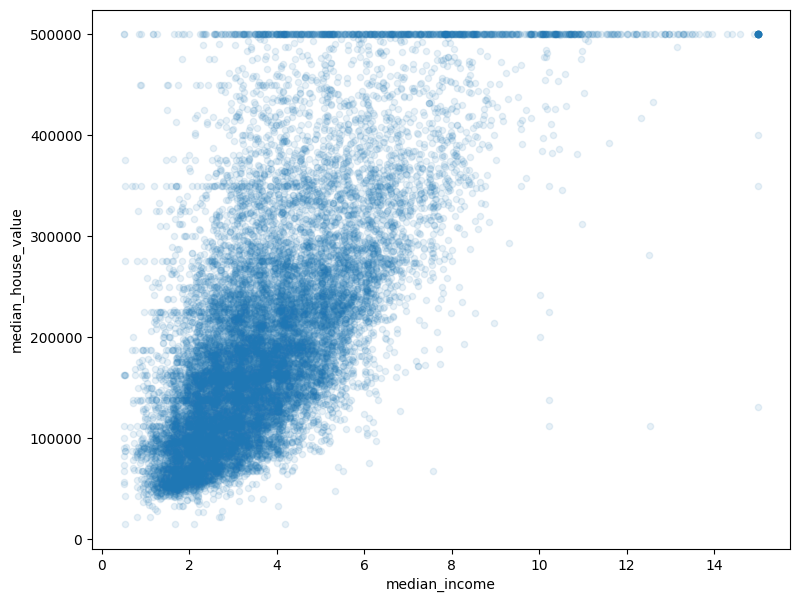

In [ ]:
housing.plot( kind='scatter', x = 'median_income', y =  'median_house_value',  figsize=(9,7), alpha = 0.1) #eng katta bo'g'liqlidi bor, ikkita ustun korrelatsiyasi
plt.show()

In [ ]:
#yaxshiroq tahlil uchun, yangi ustunlar qo'shish mumkin
housing['rooms_per_household'] = housing['total_rooms']/housing['households']
housing['bedrooms_per_room'] = housing['total_bedrooms']/housing['total_rooms']
housing['population_per_household'] = housing['population']/housing['households']

In [ ]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household
11912,-117.44,33.96,29.0,124.0,22.0,50.0,18.0,12.5381,112500.0,INLAND,6.888889,0.177419,2.777778
16247,-121.27,37.98,43.0,1005.0,200.0,492.0,172.0,2.6812,72800.0,INLAND,5.843023,0.199005,2.860465
16551,-121.23,37.82,14.0,1847.0,325.0,1030.0,309.0,4.9271,155300.0,INLAND,5.977346,0.175961,3.333333
13960,-116.90,34.25,16.0,3018.0,523.0,556.0,244.0,3.5288,189700.0,INLAND,12.368852,0.173294,2.278689
19232,-122.66,38.48,21.0,2066.0,393.0,919.0,395.0,3.2670,176200.0,<1H OCEAN,5.230380,0.190223,2.326582


In [ ]:
housing.corrwith(housing['median_house_value'], numeric_only=True).sort_values(ascending = False) #katta o'zgarish bo'lmadi lekin bor

,0
median_house_value,1.000000
median_income,0.686911
rooms_per_household,0.165598
total_rooms,0.137420
housing_median_age,0.103510
households,0.068777
total_bedrooms,0.052306
population_per_household,-0.022183
population,-0.022215
longitude,-0.050266


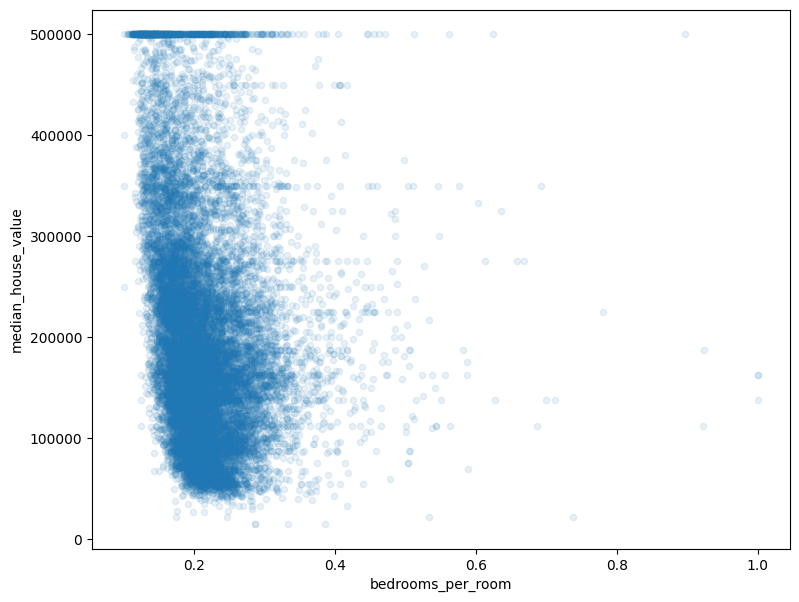

In [ ]:
housing.plot( kind='scatter', x = 'bedrooms_per_room', y =  'median_house_value',  figsize=(9,7), alpha = 0.1)
plt.show()